<a href="https://colab.research.google.com/github/SGSrinidhi03/machine-learning/blob/main/iprml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [4]:
df = pd.read_csv('CT_scans.csv')

In [5]:
columns = ['Age', 'Gender', 'GGO', 'Consolidation', 'Crazy_paving']

X = df.drop(columns=['Survival'])
y = df['Survival']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)


SVC()

In [8]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [9]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         4

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



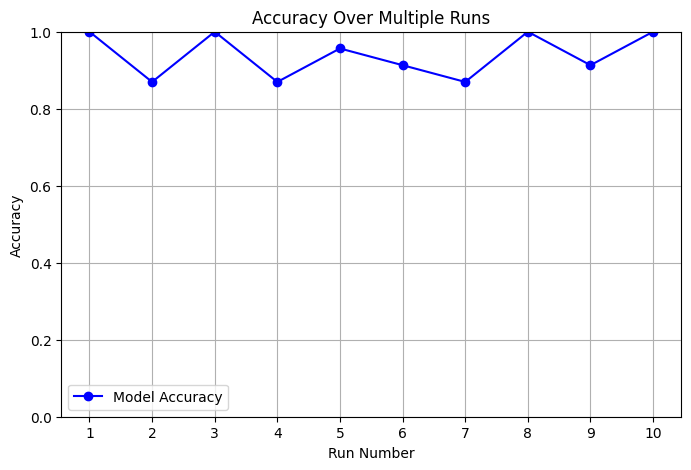

In [10]:
import matplotlib.pyplot as plt


runs = list(range(1, 11))
accuracy_values = []

for i in runs:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy_values.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.plot(runs, accuracy_values, marker='o', linestyle='-', color='b', label='Model Accuracy')


plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Multiple Runs')
plt.xticks(runs)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)


plt.show()


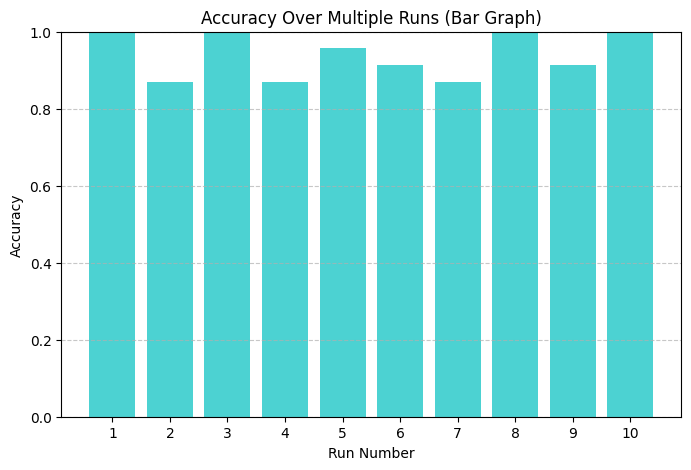

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap

# Bar Graph
plt.figure(figsize=(8, 5))
plt.bar(runs, accuracy_values, color='c', alpha=0.7)
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Multiple Runs (Bar Graph)')
plt.xticks(runs)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


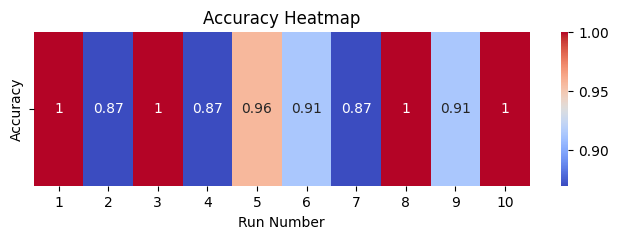

In [12]:
import numpy as np


heatmap_data = np.array(accuracy_values).reshape(1, -1)

plt.figure(figsize=(8, 2))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True, xticklabels=runs, yticklabels=['Accuracy'])
plt.xlabel('Run Number')
plt.title('Accuracy Heatmap')
plt.show()
